# About the chronicle2050 dataset

- CODE + DATASET: [chronicle205](https://github.com/regevson/chronicle2050/tree/master/dataset)
- PAPER: [Future Timelines: Extraction and Visualization of Future-Related](https://dl.acm.org/doi/10.1145/3616855.3635693)
    - 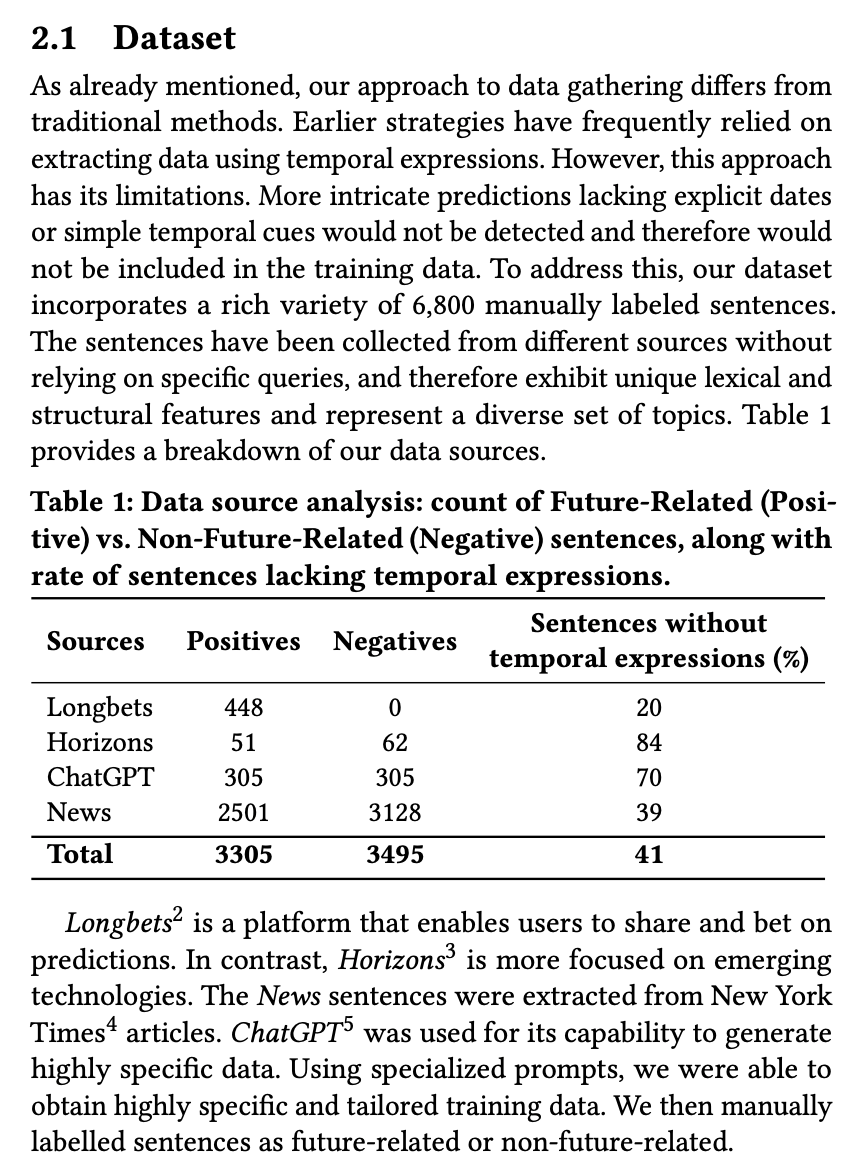

In [1]:
import os
import sys

import pandas as pd

notebook_dir = os.getcwd()

sys.path.append(os.path.join(notebook_dir, '../'))

from data_processing import DataProcessing

In [2]:
# pd.set_option('max_colwidth', 800)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', 40)
# pd.set_option('display.max_rows', None)

In [3]:
base_data_path = os.path.join(notebook_dir, '../data')
data_path = os.path.join(base_data_path, 'chronicle2050/data.csv')
df = DataProcessing.load_from_file(data_path, 'csv', sep=',')

In [4]:
df.head(7)

,index,sentence,label
0,0,"By January 1st, 2037, Tesla will have been the...",1
1,1,An annual average temperature anomaly value ab...,1
2,2,Private Nonfarm business productivity growth w...,1
3,3,No Republican will be President of the USA bef...,1
4,4,The market capitalization of Berkshire Hathawa...,1
5,5,A bitcoin will be worth less than $1000US by t...,1
6,6,By 2035 there will be at least 10 people livin...,1


In [5]:
df.tail(7)

,index,sentence,label
6395,2538,Fulcrum Capital LLC grew its position in share...,0
6396,2539,"Ev Dynamics (Holdings) Limited (the ""Company"",...",0
6397,2540,Many major technology players are [TeleNav Inc...,0
6398,2541,"WaterIQ Technologies, the leader in next-gener...",0
6399,2542,The Business Research Company's 'Clean Coal Te...,0
6400,2543,'Prophecy Market Insights offers a 20% discoun...,0
6401,2544,The Northern Virginia Technology Council (NVTC...,0


# Load our model labels to compare with true labels

In [6]:
save_chronicle2050_results_path = os.path.join(base_data_path, 'inference/chronicle2050_results')

load_chronicle2050_results_path = os.path.join(base_data_path, save_chronicle2050_results_path, 'chronicle2050_results-v6.csv')
load_chronicle2050_results_df = DataProcessing.load_from_file(load_chronicle2050_results_path, sep=',')
load_chronicle2050_results_df

,index,sentence,label,sentence embedding,logistic_regression-Sentence Label,sgd_classifier-Sentence Label,random_forest_classifier-Sentence Label,decision_tree_classifier-Sentence Label,gradient_boosting_classifier-Sentence Label,ridge_classifier-Sentence Label,perceptron-Sentence Label
0,0,"By January 1st, 2037, Tesla will have been the...",1,[-4.69374172e-02 1.84888348e-01 -1.93335768e-...,0,0,0,0,0,0,0
1,1,An annual average temperature anomaly value ab...,1,[-8.03273544e-02 1.84596255e-01 9.70091950e-...,1,1,0,0,0,1,1
2,2,Private Nonfarm business productivity growth w...,1,[-9.73114073e-02 2.70783365e-01 2.02017017e-...,0,1,0,0,0,0,1
3,3,No Republican will be President of the USA bef...,1,[ 2.90547162e-02 1.90217629e-01 6.58295751e-...,0,0,0,0,1,0,1
4,4,The market capitalization of Berkshire Hathawa...,1,[-5.81037253e-02 2.09591284e-01 9.17413309e-...,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6397,2540,Many major technology players are [TeleNav Inc...,0,[-7.08454847e-02 2.86577821e-01 1.46868899e-...,0,0,0,0,0,0,0
6398,2541,"WaterIQ Technologies, the leader in next-gener...",0,[-1.17602259e-01 1.60711572e-01 -3.88529971e-...,0,0,0,0,0,0,0
6399,2542,The Business Research Company's 'Clean Coal Te...,0,[-1.27419010e-01 2.02838704e-01 2.33079996e-...,0,0,0,0,0,0,0
6400,2543,'Prophecy Market Insights offers a 20% discoun...,0,[-1.09398074e-01 1.96296409e-01 -7.04343393e-...,0,0,0,0,0,0,0


## Majority Vote across our models

In [7]:
ml_models_df = load_chronicle2050_results_df.iloc[: , 4:]
ml_models_df

,logistic_regression-Sentence Label,sgd_classifier-Sentence Label,random_forest_classifier-Sentence Label,decision_tree_classifier-Sentence Label,gradient_boosting_classifier-Sentence Label,ridge_classifier-Sentence Label,perceptron-Sentence Label
0,0,0,0,0,0,0,0
1,1,1,0,0,0,1,1
2,0,1,0,0,0,0,1
3,0,0,0,0,1,0,1
4,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...
6397,0,0,0,0,0,0,0
6398,0,0,0,0,0,0,0
6399,0,0,0,0,0,0,0
6400,0,0,0,0,0,0,0


In [8]:
mv_per_row = ml_models_df.mode(axis=1)
load_chronicle2050_results_df['majority vote'] = mv_per_row
load_chronicle2050_results_df

,index,sentence,label,sentence embedding,logistic_regression-Sentence Label,sgd_classifier-Sentence Label,random_forest_classifier-Sentence Label,decision_tree_classifier-Sentence Label,gradient_boosting_classifier-Sentence Label,ridge_classifier-Sentence Label,perceptron-Sentence Label,majority vote
0,0,"By January 1st, 2037, Tesla will have been the...",1,[-4.69374172e-02 1.84888348e-01 -1.93335768e-...,0,0,0,0,0,0,0,0
1,1,An annual average temperature anomaly value ab...,1,[-8.03273544e-02 1.84596255e-01 9.70091950e-...,1,1,0,0,0,1,1,1
2,2,Private Nonfarm business productivity growth w...,1,[-9.73114073e-02 2.70783365e-01 2.02017017e-...,0,1,0,0,0,0,1,0
3,3,No Republican will be President of the USA bef...,1,[ 2.90547162e-02 1.90217629e-01 6.58295751e-...,0,0,0,0,1,0,1,0
4,4,The market capitalization of Berkshire Hathawa...,1,[-5.81037253e-02 2.09591284e-01 9.17413309e-...,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6397,2540,Many major technology players are [TeleNav Inc...,0,[-7.08454847e-02 2.86577821e-01 1.46868899e-...,0,0,0,0,0,0,0,0
6398,2541,"WaterIQ Technologies, the leader in next-gener...",0,[-1.17602259e-01 1.60711572e-01 -3.88529971e-...,0,0,0,0,0,0,0,0
6399,2542,The Business Research Company's 'Clean Coal Te...,0,[-1.27419010e-01 2.02838704e-01 2.33079996e-...,0,0,0,0,0,0,0,0
6400,2543,'Prophecy Market Insights offers a 20% discoun...,0,[-1.09398074e-01 1.96296409e-01 -7.04343393e-...,0,0,0,0,0,0,0,0


In [9]:
true_label_vs_models_label_df = load_chronicle2050_results_df.loc[:, ["sentence", "label", "majority vote", "sentence embedding"]]
true_label_vs_models_label_df

,sentence,label,majority vote,sentence embedding
0,"By January 1st, 2037, Tesla will have been the...",1,0,[-4.69374172e-02 1.84888348e-01 -1.93335768e-...
1,An annual average temperature anomaly value ab...,1,1,[-8.03273544e-02 1.84596255e-01 9.70091950e-...
2,Private Nonfarm business productivity growth w...,1,0,[-9.73114073e-02 2.70783365e-01 2.02017017e-...
3,No Republican will be President of the USA bef...,1,0,[ 2.90547162e-02 1.90217629e-01 6.58295751e-...
4,The market capitalization of Berkshire Hathawa...,1,0,[-5.81037253e-02 2.09591284e-01 9.17413309e-...
...,...,...,...,...
6397,Many major technology players are [TeleNav Inc...,0,0,[-7.08454847e-02 2.86577821e-01 1.46868899e-...
6398,"WaterIQ Technologies, the leader in next-gener...",0,0,[-1.17602259e-01 1.60711572e-01 -3.88529971e-...
6399,The Business Research Company's 'Clean Coal Te...,0,0,[-1.27419010e-01 2.02838704e-01 2.33079996e-...
6400,'Prophecy Market Insights offers a 20% discoun...,0,0,[-1.09398074e-01 1.96296409e-01 -7.04343393e-...


In [10]:
diff_labels_df = true_label_vs_models_label_df.query("label != `majority vote`")
diff_labels_df

,sentence,label,majority vote,sentence embedding
0,"By January 1st, 2037, Tesla will have been the...",1,0,[-4.69374172e-02 1.84888348e-01 -1.93335768e-...
2,Private Nonfarm business productivity growth w...,1,0,[-9.73114073e-02 2.70783365e-01 2.02017017e-...
3,No Republican will be President of the USA bef...,1,0,[ 2.90547162e-02 1.90217629e-01 6.58295751e-...
4,The market capitalization of Berkshire Hathawa...,1,0,[-5.81037253e-02 2.09591284e-01 9.17413309e-...
10,"Over a ten-year period commencing on July 1, 2...",1,0,[-1.03356980e-01 1.44637421e-01 -4.59992839e-...
...,...,...,...,...
6366,"Youth Sports Market 2023 Share, Growth, Segmen...",0,1,[-3.33087146e-02 4.32247132e-01 7.01236585e-...
6367,But will the end result appear the same?,0,1,[ 2.52095629e-02 1.34403348e-01 -1.70240343e-...
6368,"In this article, we will explore the unique ro...",0,1,[ 8.71468484e-02 1.95162952e-01 -5.56851402e-...
6378,Ultron's rumored return in Armor Wars would be...,0,1,[-3.02092684e-03 1.02326840e-01 4.89601493e-...


In [11]:

# import numpy as np
# import pandas as pd

# def parse_ws_vector(x):
#     """
#     Convert:
#       - numpy arrays (return as-is)
#       - Python lists/tuples of numbers
#       - strings like "[0.1  0.2 -0.3\n 1.0e-01]" (no commas)
#       - strings like "0.1 0.2 -0.3" (no brackets)
#     into a 1D numpy array of dtype float.
#     """
#     if isinstance(x, np.ndarray):
#         return x
#     if isinstance(x, (list, tuple)):
#         return np.array(x, dtype=float)
#     if pd.isna(x):
#         return np.array([], dtype=float)

#     s = str(x).strip()
#     # remove surrounding brackets if present
#     if len(s) >= 2 and s[0] in "[(" and s[-1] in "])":
#         s = s[1:-1].strip()

#     # np.fromstring parses whitespace-separated floats
#     arr = np.fromstring(s, sep=' ')
#     if arr.size == 0:
#         raise ValueError(f"Could not parse embedding from value: {x!r}")
#     return arr

# # Apply to your column (adjust the column name if different)
# true_label_vs_models_label_df["sentence embedding"] = (
#     true_label_vs_models_label_df["sentence embedding"].apply(parse_ws_vector)
# )
# true_label_vs_models_label_df


In [12]:

# true_label_vs_models_label_df["sentence embedding"].dtype
# print(repr(true_label_vs_models_label_df["sentence embedding"].iloc[0]))

In [13]:

import numpy as np
import ast

def to_array(x):
    # Already a numpy array → return as-is
    if isinstance(x, np.ndarray):
        return x
    
    # Already a Python list → convert to array
    if isinstance(x, list):
        return np.array(x, dtype=float)
    
    # Convert everything else to string
    s = str(x).strip()
    
    # Try literal_eval first (handles comma-separated lists)
    try:
        val = ast.literal_eval(s)
        return np.array(val, dtype=float)
    except Exception:
        pass
    
    # Fallback: remove brackets and parse whitespace-separated floats
    if s.startswith("[") and s.endswith("]"):
        s = s[1:-1]  # trim outer brackets
    
    # Remove newlines, collapse spaces
    s = " ".join(s.split())
    
    # Parse via numpy
    arr = np.fromstring(s, sep=" ")
    return arr

diff_labels_df["sentence embedding"] = (
    diff_labels_df["sentence embedding"].apply(to_array)
)
diff_labels_df


/var/folders/78/9z0b45fx1xqbwxh8vk97lcfh0000gn/T/ipykernel_41023/423499678.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_labels_df["sentence embedding"] = (


,sentence,label,majority vote,sentence embedding
0,"By January 1st, 2037, Tesla will have been the...",1,0,"[-0.0469374172, 0.184888348, -0.0193335768, -0..."
2,Private Nonfarm business productivity growth w...,1,0,"[-0.0973114073, 0.270783365, 0.0202017017, -0...."
3,No Republican will be President of the USA bef...,1,0,"[0.0290547162, 0.190217629, 0.0658295751, -0.1..."
4,The market capitalization of Berkshire Hathawa...,1,0,"[-0.0581037253, 0.209591284, 0.0917413309, -0...."
10,"Over a ten-year period commencing on July 1, 2...",1,0,"[-0.10335698, 0.144637421, -0.00459992839, 0.0..."
...,...,...,...,...
6366,"Youth Sports Market 2023 Share, Growth, Segmen...",0,1,"[-0.0333087146, 0.432247132, 0.00701236585, 0...."
6367,But will the end result appear the same?,0,1,"[0.0252095629, 0.134403348, -0.170240343, -0.0..."
6368,"In this article, we will explore the unique ro...",0,1,"[0.0871468484, 0.195162952, -0.0556851402, -0...."
6378,Ultron's rumored return in Armor Wars would be...,0,1,"[-0.00302092684, 0.10232684, 0.0489601493, 0.0..."


In [14]:
type(diff_labels_df["sentence embedding"].iloc[0])

numpy.ndarray

In [15]:
diff_labels_df["sentence embedding"].apply(lambda v: isinstance(v, np.ndarray)).all()

np.True_

In [16]:

import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_clusters(embeddings, n_clusters):

    # Convert list/Series of arrays → 2D numpy array
    X = np.vstack(embeddings)

    # --------------------------
    # Run clustering
    # --------------------------
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
    labels = kmeans.fit_predict(X)

    # --------------------------
    # Run 2D t-SNE for visualization
    # --------------------------
    tsne = TSNE(
        n_components=2,
        learning_rate='auto',
        init='random',
        perplexity=3
    ).fit_transform(X)

    # --------------------------
    # Plot
    # --------------------------
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=labels, cmap='viridis', s=60, alpha=0.8)
    
    plt.title("t-SNE Visualization of KMeans Clusters")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.show()


In [17]:
embeddings = diff_labels_df['sentence embedding'].values
embeddings

array([array([-4.69374172e-02,  1.84888348e-01, -1.93335768e-02, -9.02862772e-02,
               1.68473534e-02, -3.81664895e-02, -1.63531769e-02, -1.04354145e-02,
              -7.22431466e-02,  1.95659888e+00, -1.30642146e-01,  4.39356528e-02,
               4.09358880e-03, -4.30947030e-03, -1.43232003e-01, -4.45334390e-02,
              -6.37655705e-02,  1.31348407e+00, -1.96148276e-01, -7.53806625e-03,
               5.34993364e-04,  1.06391516e-02,  3.99787091e-02, -5.37471436e-02,
               8.91714022e-02, -6.97841728e-03, -4.38877270e-02, -1.53977817e-05,
               4.13725600e-02,  2.57428102e-02, -2.37145741e-02, -4.67201602e-03,
              -1.44003592e-02,  6.77142218e-02,  6.98846653e-02, -1.18805088e-01,
              -1.23898927e-02,  8.20143372e-02, -1.44622019e-02,  1.00853778e-02,
               3.10089011e-02,  6.55200332e-02,  4.72119711e-02,  6.63663372e-02,
              -2.14432925e-02,  7.65202986e-03, -7.42747486e-02,  5.59648909e-02,
               3

/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/detraviousjamaribrinkley/Documents/Developme

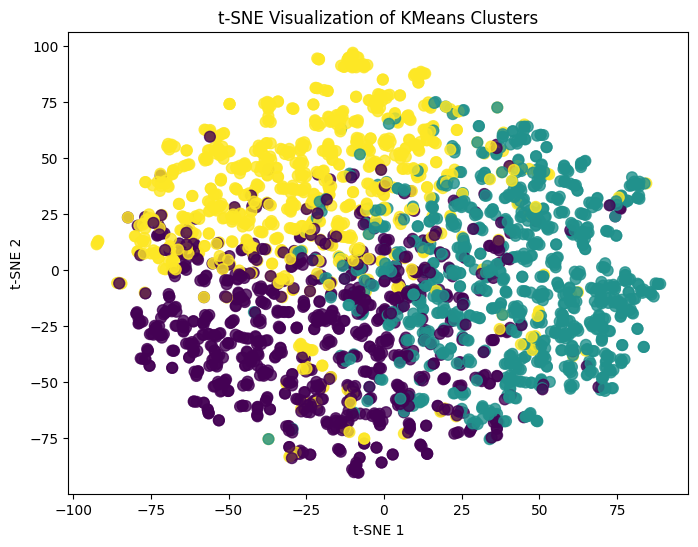

In [18]:
plot_clusters(embeddings, 3)

In [19]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_clusters(embeddings, n_clusters):
    # Convert array-like embeddings → 2D matrix
    X = np.vstack(embeddings)

    # --------------------------
    # Run clustering
    # --------------------------
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
    labels = kmeans.fit_predict(X)

    # --------------------------
    # Run 2D t-SNE for visualization
    # --------------------------
    tsne = TSNE(
        n_components=2,
        learning_rate='auto',
        init='random',
        perplexity=3
    ).fit_transform(X)

    # --------------------------
    # Plot
    # --------------------------
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=labels, cmap='viridis', s=60, alpha=0.8)
    plt.title("t-SNE Visualization of KMeans Clusters")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.show()

    return labels

/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/detraviousjamaribrinkley/Documents/Developme

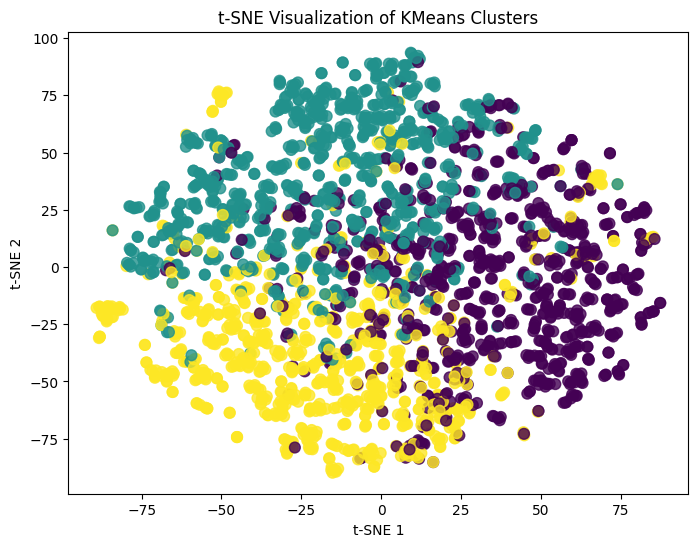

In [20]:
embeddings = diff_labels_df["sentence embedding"].values
labels = plot_clusters(embeddings, n_clusters=3)

In [21]:
# -----------------------------------------
# GET SAMPLE SENTENCES FROM EACH CLUSTER
# -----------------------------------------
diff_labels_df["cluster"] = labels

for c in sorted(diff_labels_df["cluster"].unique()):
    print(f"\n=== Cluster {c} ===")
    examples = diff_labels_df[diff_labels_df["cluster"] == c]["sentence"].head(7)
    for s in examples:
        print(" -", s)
        sentence_df = diff_labels_df[diff_labels_df['sentence'] == s]
        original_and_mv_labels = sentence_df.loc[: , ["label", "majority vote"]].values
        print("\t -", original_and_mv_labels)
        # majority_vote = diff_labels_df[diff_labels_df["majority vote"] == c]["sentence"].head(5)


=== Cluster 0 ===
 - By January 1st, 2037, Tesla will have been the first company with 1 million vehicles that are capable of SAE Level 4 autonomy on over 90% of public roads in the contiguous United States, with human-level safety or better, and this capability will be usable by the general public commercially.
	 - [[1 0]]
 - Private Nonfarm business productivity growth will average over 1.8 percent per year from the first quarter (Q1) of 2020 to the last quarter of 2029 (Q4).
	 - [[1 0]]
 - Over a ten-year period commencing on July 1, 2020, and ending on June 30, 2030, a portfolio of index funds invested broadly in US and International equities will outperform a portfolio managed by a sophisticated individual investor selecting stocks and funds.
	 - [[1 0]]
 - The annual rate of US labor productivity growth for the year 02025, as measured by the U.S. Bureau of Labor Statistics, will be 2 percent or above.
	 - [[1 0]]
 - Clinicians and neuroscientists will develop well validated brai

/var/folders/78/9z0b45fx1xqbwxh8vk97lcfh0000gn/T/ipykernel_41023/943668472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_labels_df["cluster"] = labels
